In [1]:
import networkx as nx
import numpy as np; np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate

from simulate import ODE_simulate, GILL_simulate
from plot_module import plot_ODE, plot_gillespie, plot_network
from sim_param_from_network import names_from_network, gillespie_param_from_network, dataframes_from_network, ODE_from_network
from network_generate import sim_helpers_from_network, net_gen_hub_ring, net_gen_line_chain, net_gen_line_ring, net_gen_line_powlawtree

import libgillespie

In [2]:
TIME_POINTS = np.linspace(0, 1000, 1001)

start_pop = [90, 20]

SOMA_CB = 0.5
SOMA_BR = 0.4
SOMA_NSS = 100
SOMA_DIFFUSION = 0.4

DELTA = 0.5
DEATH_RATE = 0.4



AXON_TRNSP_ANT = 8
AXON_TRNSP_RET = 6

BIO_PARAM = {
    'soma_cb':SOMA_CB, 
    'soma_br':SOMA_BR, 
    'soma_nss':SOMA_NSS,
    'soma_diffusion':SOMA_DIFFUSION,
    
    'delta':DELTA, 
    'death_rate':DEATH_RATE, 
    
    'gamma_ant':AXON_TRNSP_ANT,
    'gamma_ret':AXON_TRNSP_RET,
    }

## Create network representing neuron

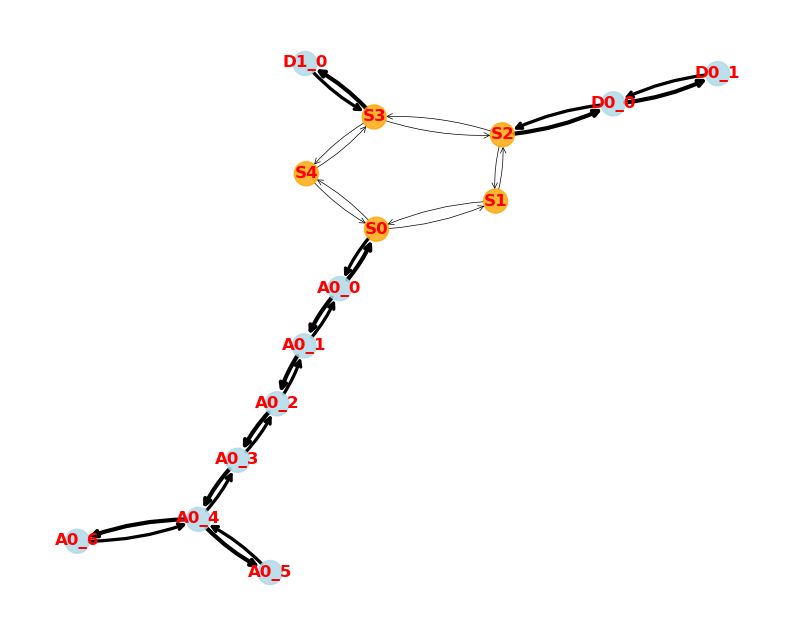

In [3]:
# add main ring for soma
SOMA_G = net_gen_hub_ring(n_nodes=5, bio_param=BIO_PARAM)

# add main axon arbor
NEURON_G = net_gen_line_powlawtree(n_nodes = 7, bio_param = BIO_PARAM, line_type = 'A0_', attach_graph = SOMA_G, attach_node = 'S0')

# add dendrites
NEURON_G = net_gen_line_chain(n_nodes = 2, bio_param = BIO_PARAM, line_type = 'D0_', attach_graph = NEURON_G, attach_node = 'S2')
# add dendrites
NEURON_G = net_gen_line_chain(n_nodes = 1, bio_param = BIO_PARAM, line_type = 'D1_', attach_graph = NEURON_G, attach_node = 'S3')

plot_network(NEURON_G)

VARS, NODE_LABELS, START_STATE = sim_helpers_from_network(NEURON_G, start_pop)

### ODE model

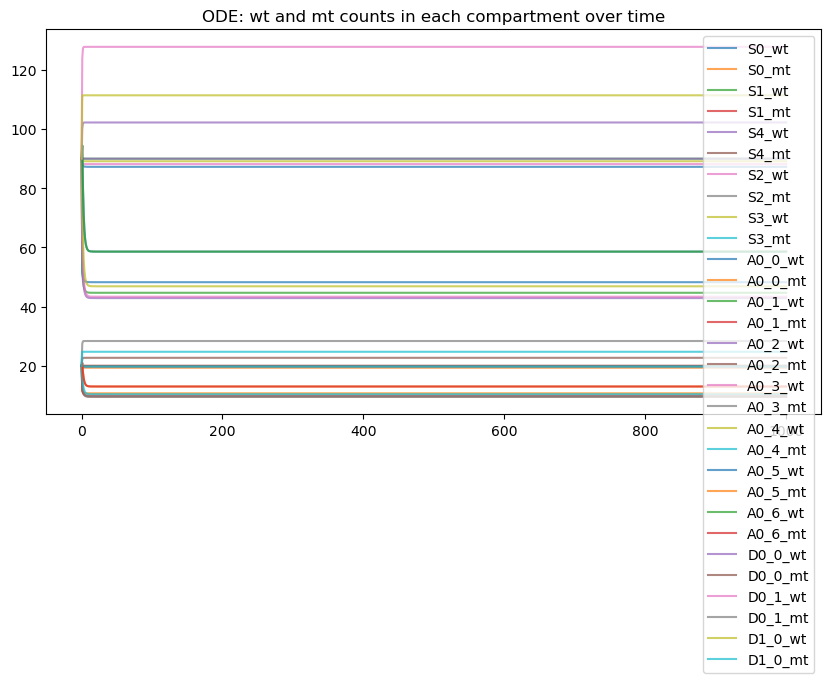

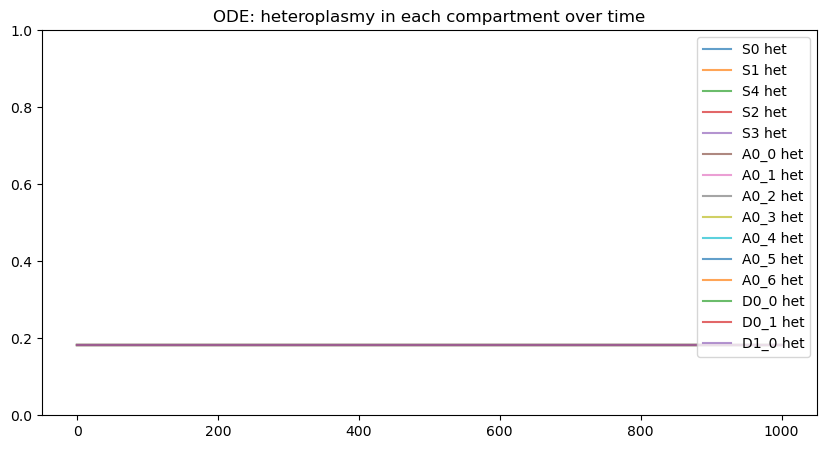

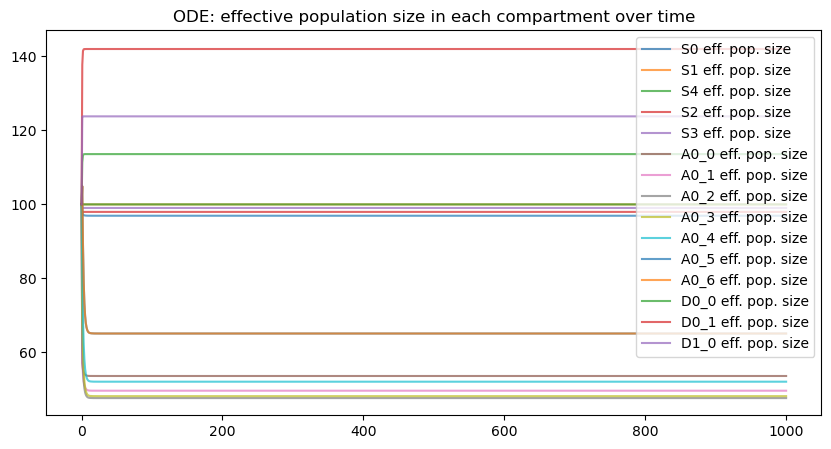

> Final counts of mt and wt in each compartment:
S0_wt	87.2123	
S0_mt	19.3805	
S1_wt	89.9634	
S1_mt	19.9919	
S4_wt	89.9709	
S4_mt	19.9935	
S2_wt	88.1444	
S2_mt	19.5876	
S3_wt	89.0993	
S3_mt	19.7999	
A0_0_wt	48.2506	
A0_0_mt	10.7223	
A0_1_wt	44.6725	
A0_1_mt	9.9272	
A0_2_wt	42.88	
A0_2_mt	9.5289	
A0_3_wt	43.3487	
A0_3_mt	9.633	
A0_4_wt	46.8634	
A0_4_mt	10.4141	
A0_5_wt	58.5793	
A0_5_mt	13.0176	
A0_6_wt	58.5793	
A0_6_mt	13.0176	
D0_0_wt	102.1964	
D0_0_mt	22.7103	
D0_1_wt	127.7455	
D0_1_mt	28.3879	
D1_0_wt	111.3742	
D1_0_mt	24.7498	

> Final effective population sizes in each compartment:
S0	96.9026	
S1	99.9594	
S4	99.9677	
S2	97.9382	
S3	98.9993	
A0_0	53.6117	
A0_1	49.6362	
A0_2	47.6445	
A0_3	48.1652	
A0_4	52.0705	
A0_5	65.0881	
A0_6	65.0881	
D0_0	113.5516	
D0_1	141.9394	
D1_0	123.7491	


In [4]:
ODE_model = ODE_from_network(NEURON_G)
plot_ODE(ODE_simulate(ODE_model, TIME_POINTS, START_STATE), TIME_POINTS, DELTA, VARS, NODE_LABELS)

### Gillespie model


>> Gillespie simulation parameters:

> Reactions:
react.#	state i	type	rate	update to system
0	0	birth	-1	[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1	1	birth	-1	[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2	2	birth	-1	[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3	3	birth	-1	[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4	4	birth	-1	[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5	5	birth	-1	[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
6	6	birth	-1	[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7	7	birth	-1	[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8	8	birth	-1	[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

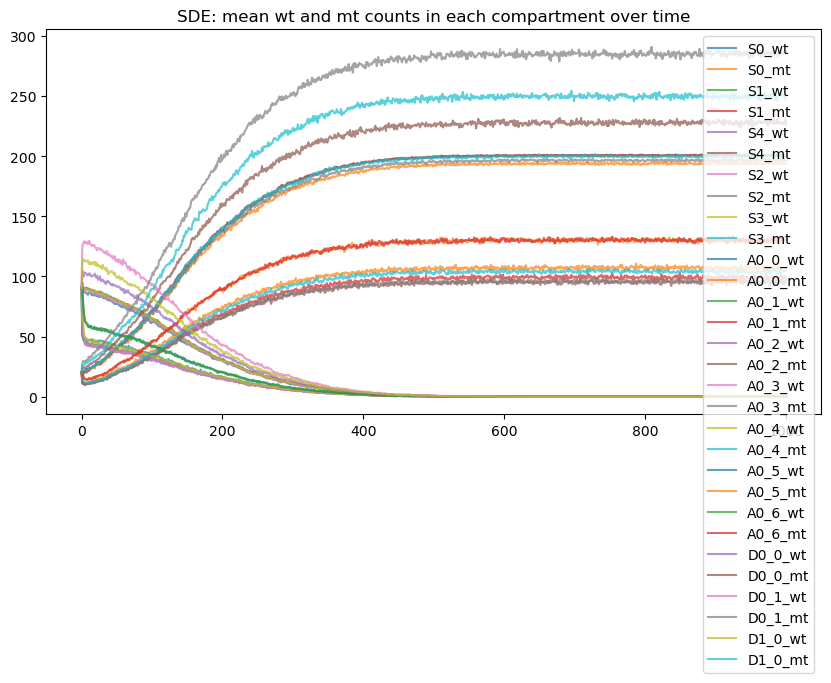

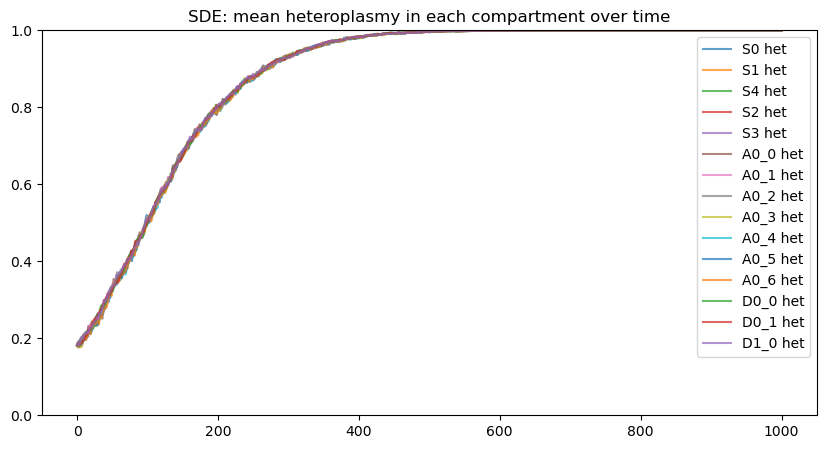

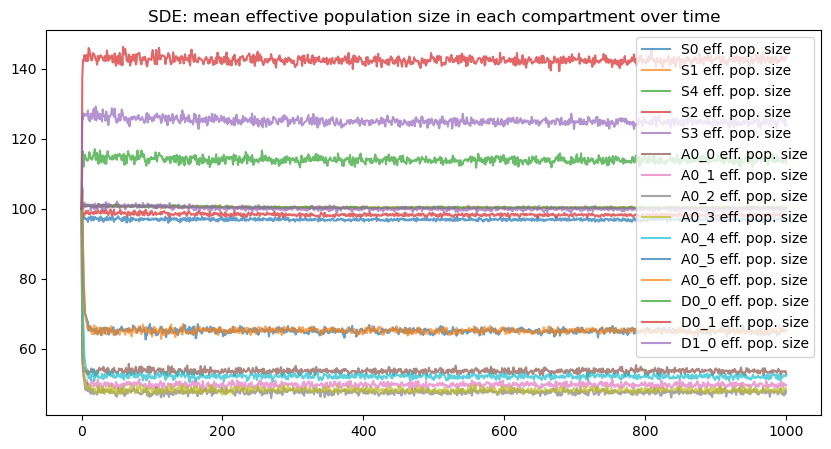

> Final mean counts of mt and wt in each compartment:
S0_wt	0.0	
S0_mt	193.75	
S1_wt	0.0	
S1_mt	200.6	
S4_wt	0.0	
S4_mt	200.68	
S2_wt	0.0	
S2_mt	196.39	
S3_wt	0.0	
S3_mt	199.35	
A0_0_wt	0.0	
A0_0_mt	105.65	
A0_1_wt	0.0	
A0_1_mt	99.21	
A0_2_wt	0.0	
A0_2_mt	96.15	
A0_3_wt	0.0	
A0_3_mt	97.27	
A0_4_wt	0.0	
A0_4_mt	104.78	
A0_5_wt	0.0	
A0_5_mt	130.31	
A0_6_wt	0.0	
A0_6_mt	130.2	
D0_0_wt	0.0	
D0_0_mt	226.09	
D0_1_wt	0.0	
D0_1_mt	286.91	
D1_0_wt	0.0	
D1_0_mt	250.93	

> Final mean heteroplasmy in each compartment:
S0	1.0	
S1	1.0	
S4	1.0	
S2	1.0	
S3	1.0	
A0_0	1.0	
A0_1	1.0	
A0_2	1.0	
A0_3	1.0	
A0_4	1.0	
A0_5	1.0	
A0_6	1.0	
D0_0	1.0	
D0_1	1.0	
D1_0	1.0	

> Final mean effective population sizes in each compartment:
S0	96.875	
S1	100.3	
S4	100.34	
S2	98.195	
S3	99.675	
A0_0	52.825	
A0_1	49.605	
A0_2	48.075	
A0_3	48.635	
A0_4	52.39	
A0_5	65.155	
A0_6	65.1	
D0_0	113.045	
D0_1	143.455	
D1_0	125.465	

> Change in mean heteroplasmy: 
start: 0.1818
final: 1.0
delta: 0.8182
CPU times: user 28min 14s, sys

In [5]:
%%time
GILL_PARAM = gillespie_param_from_network(NEURON_G)
plot_gillespie(GILL_simulate(GILL_PARAM, TIME_POINTS, START_STATE, replicates=100), TIME_POINTS, DELTA, VARS, NODE_LABELS)